In [ ]:
# Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 결측치 처리
print(train_df.info()) #Age
print(test_df.info()) # Age, Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [4]:
train_df.Age.fillna(train_df.Age.dropna().mean(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.Ticket.describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [6]:
test_df.Age.fillna(test_df.Age.dropna().median(), inplace=True)
test_df.Ticket.fillna(test_df['Ticket'].mode()[0], inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin",axis=1, inplace=True)
# train_df.loc[train_df.Cabin.isnull()==False]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df = pd.DataFrame(train_df['Age'].groupby(by=pd.cut(train_df.Age,4)).count())
df.index.name = "AgeBand"
df.columns = ["Count"]
df

,Count
AgeBand,
"(0.34, 20.315]",179
"(20.315, 40.21]",562
"(40.21, 60.105]",128
"(60.105, 80.0]",22


In [9]:
train_df['AgeBand'] = pd.cut(train_df['Age'],4)
print(train_df[['AgeBand','Survived']].groupby(by='AgeBand').mean())
train_df.drop('AgeBand', axis=1, inplace=True)

                 Survived
AgeBand                  
(0.34, 20.315]   0.458101
(20.315, 40.21]  0.364769
(40.21, 60.105]  0.390625
(60.105, 80.0]   0.227273


<AxesSubplot:xlabel='Sex', ylabel='count'>

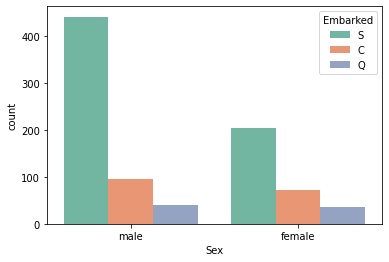

In [10]:
sns.countplot("Sex" ,hue = "Embarked", data=train_df, palette="Set2")

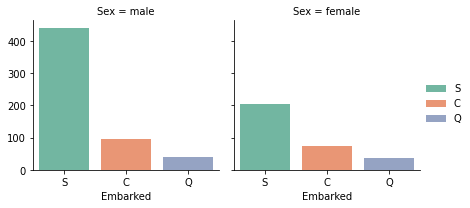

In [11]:
grid = sns.FacetGrid(col ="Sex",data=train_df)
grid.map(sns.countplot,"Embarked", hue="Embarked",palette="Set2",data=train_df,order=["S","C","Q"], hue_order=["S","C","Q"], dodge = False)
grid.add_legend()

In [12]:
train_df[["Pclass","Survived"]].groupby(by="Pclass").mean().sort_values(by="Survived", ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


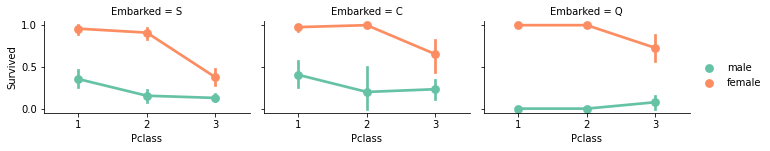

In [13]:
grid = sns.FacetGrid(col="Embarked", data=train_df, aspect=1.5, height=2.2)
grid.map(sns.pointplot, "Pclass", "Survived", hue="Sex", data=train_df, palette="Set2", order = None, hue_order = ["male","female"])
grid.add_legend()

In [14]:
combine = [train_df, test_df]
combine[0].Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [15]:
for dat in combine:
    dat["Title"] = dat.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
for dat in combine:
    dat.Title = dat.Title.replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Lady","Major","Mlle","Mme","Ms","Rev","Sir","Dona"], "Rare")
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [17]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [18]:
# for dat in combine:
#     dat['Title'] = dat.Title.map({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combine = [train_df, test_df]
for dat in combine:
    dat.drop(['Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)

train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


In [19]:
test_df.Fare = test_df.Fare.fillna(test_df.Fare.dropna().mode()[0])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Title     418 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 24.6+ KB


In [20]:
for dat in combine:
    dat['Embarked']=dat['Embarked'].fillna(dat['Embarked'].dropna().mode()[0])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [21]:
test_df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [22]:
combine = [train_df, test_df]
for dat in combine:
    dat['FamilySize'] = dat['SibSp'] + dat['Parch'] + 1
    dat["IsAlone"] = 0
    dat.loc[dat['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0


In [23]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,34.5,0,0,7.8292,1,1,0,1,0,0,0,1,0,0
1,3,0,47.0,1,0,7.0000,2,0,0,0,1,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,1,1,0,1,0,0,0,1,0,0
3,3,1,27.0,0,0,8.6625,1,1,0,0,1,0,0,1,0,0
4,3,0,22.0,1,1,12.2875,3,0,0,0,1,0,0,0,1,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("Survived",axis=1), train_df["Survived"], test_size=0.3, random_state=1)
X_train.shape

(623, 16)

<AxesSubplot:xlabel='Survived', ylabel='count'>

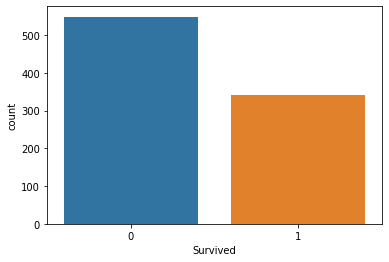

In [25]:
sns.countplot(train_df["Survived"]) #imbalalnced

In [26]:
train_df["Survived"].value_counts() # value_counts!!

0    549
1    342
Name: Survived, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),
                    LogisticRegression())
params = {'logisticregression__C':[1*10**i for i in range(-3, 3)]}
cv = GridSearchCV(pipe, param_grid=params, cv=3)
cv.fit(X_train, y_train)
cv.best_score_

0.8314443205747554

In [28]:
cv.score(X_test,y_test)

0.8283582089552238

In [29]:
# set threshold
y_pred = (cv.predict_proba(X_test)[:,1] >= 0.6).astype(bool) # better!
print(np.mean(y_pred==y_test))

0.8283582089552238


In [30]:
from sklearn.svm import SVC
pipe = make_pipeline(StandardScaler(),
                    SVC(probability=True))
params = {'svc__C':[1*10**i for i in range(-3,3)], 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid']}
cv= GridSearchCV(pipe, param_grid=params, cv=3)
cv.fit(X_train, y_train)
cv.best_score_

0.8314598042858913

In [31]:
print(cv.score(X_test, y_test))
y_pred = (cv.predict_proba(X_test)[:,1] >= 0.6).astype(bool) 
print(np.mean(y_pred==y_test)) # better!

0.8283582089552238
0.8283582089552238


In [32]:
from sklearn.neighbors import KNeighborsClassifier
pipe = make_pipeline(StandardScaler(),
                    KNeighborsClassifier())
params = {'kneighborsclassifier__n_neighbors':[i for i in range(3,6)], 'kneighborsclassifier__weights':['uniform', 'distance']}
cv= GridSearchCV(pipe, param_grid=params, cv=5)
cv.fit(X_train, y_train)
cv.best_score_

0.8265548387096775

In [33]:
print(cv.score(X_test, y_test)) 
y_pred = (cv.predict_proba(X_test)[:,1] >= 0.6).astype(bool) 
print(np.mean(y_pred==y_test))

0.8022388059701493
0.8022388059701493


In [34]:
from sklearn.ensemble import RandomForestClassifier
pipe = make_pipeline(StandardScaler(),
                    RandomForestClassifier())
params = {'randomforestclassifier__n_estimators':[10**i for i in range(1,3)], 'randomforestclassifier__criterion':["gini", "entropy"]}
cv= GridSearchCV(pipe, param_grid=params, cv=5)
cv.fit(X_train, y_train)
cv.best_score_

0.8201806451612903

In [35]:
print(cv.score(X_test, y_test)) # best
y_pred = (cv.predict_proba(X_test)[:,1] >= 0.6).astype(bool) 
print(np.mean(y_pred==y_test)) # best

0.8134328358208955
0.8246268656716418


In [36]:
from xgboost import XGBClassifier
pipe = make_pipeline(StandardScaler(),
                    XGBClassifier(subsample=0.9))
params = {'xgbclassifier__n_estimators': [10**i for i in range(4)], 'xgbclassifier__max_depth':[i for i in range(1,10)]}
cv= GridSearchCV(pipe, param_grid=params, cv=5)
cv.fit(X_train, y_train)
cv.best_score_

0.8458709677419355

In [37]:
cv.best_params_

{'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 100}

In [38]:
print(cv.score(X_test, y_test))
y_pred = (cv.predict_proba(X_test)[:,1] >= 0.6).astype(bool) 
print(np.mean(y_pred==y_test)) # good

0.8097014925373134
0.8246268656716418


In [170]:
sub = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': cv.predict(test_df)})
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [101]:
sub.to_csv("submission.csv", index=False)

In [ ]:
# string parsing

In [40]:
#문자열 slicing
string="coding test"

In [45]:
# indexing using list
temp = list(string)
temp[temp.index('t')]='r'
string=''.join(temp)
print(string)

coding rest


In [46]:
string="coding test"
string=string[:string.index('t')]+'r'+string[string.index('t')+1:]
print(string)

coding rest


In [55]:
# .index = .find
string = "Python is the best choice"
print(string.find('b'))
print(string.find('k')) # 없으면 -1

14
-1


In [56]:
string.replace("bbest","worse")

'Python is the best choice'

In [57]:
string.split()

['Python', 'is', 'the', 'best', 'choice']

In [60]:
string='a,b,c,d'
string.split(',')

['a', 'b', 'c', 'd']

In [62]:
import re

In [70]:
# \d - digit=숫자, [0-9]와 동일
# \D - 숫자가 아닌 것
# \s - whitespace(공백), [ \t\n\r\f\v]와 동일
# \S - whitespace 아닌 것
# \w - word = 문자+숫자(alphanumeric), [a-zA-Z0-9_]와 동일
# \W - 문자+숫자(alphanumeric)가 아닌 것
# +  - 1번 이상 반복
# *  - 0번 이상 반복
# ^ - Start of string
p = re.compile('[a-z]+')
p = p.finditer("python 123, hello 2Erin!")
x = [x.group() for x in p]
x

['python', 'hello', 'rin']

In [71]:
p = re.compile('[a-z]+')
result = p.findall("life is too short")
print(result)

['life', 'is', 'too', 'short']


In [74]:
p = re.compile(r'a.+b') # . = \n 을 제외한 모든 문자 (. 도 물론 포함)
m=p.findall("asfsddsfdss,,nn..nbb \n ,,b")
m

['asfsddsfdss,,nn..nbb']

In [75]:
p = re.compile(r'a\.+') # \. = 문자 . 같은 방식으로 [.] 도 가능.
m=p.findall("a. b. ab... b")
m 

['a.']

In [76]:
p = re.compile(r'\d{2,3}') # 범위 지정
m=p.findall("1 23 456 7890")
m 

['23', '456', '789']

In [77]:
data = """
park 800905-1049118
kim  700905-1059119
"""

pat = re.compile("(\d{6})-(\d{7})") # 더 명료하게 하기 위해 [-] 해도 됨
print(pat.sub("\g<1>-*******", data)) # data라는 string에서 특정 패턴에 대해 substitute해라.
# 여기서 g<1>은 ()로 구분한 group 1. 이건 그대로 두고 뒤에 -******** 로 바꿔라


park 800905-*******
kim  700905-*******



In [90]:
df=pd.DataFrame({'phone number':['010-1234-5678','010-9876-5678'],'number': ['900000-1123456','920391-1234567']})
df

,phone number,number
0,010-1234-5678,900000-1123456
1,010-9876-5678,920391-1234567


In [91]:
def star(name):
    p= re.compile(r'(\d{6})-(\d{7})')
    return p.sub("\g<1>-********", name) # (\d{3}-\d{4})-(\d{4}) 뒷자리 가리려면

df["number"]=df["number"].apply(star)
df

,phone number,number
0,010-1234-5678,900000-********
1,010-9876-5678,920391-********


In [92]:
df=pd.DataFrame({'phone number':['010-1234-5678','010-9876-5678'],'number': ['900000-1123456','920391-1234567'], 'name':['sara','bob']})
df

,phone number,number,name
0,010-1234-5678,900000-1123456,sara
1,010-9876-5678,920391-1234567,bob


In [94]:
df = df[["name","phone number","number"]]
df

,name,phone number,number
0,sara,010-1234-5678,900000-1123456
1,bob,010-9876-5678,920391-1234567


In [96]:
df['name'].str.count(r'(^s.*)').sum()

1

In [101]:
# indexing
df[df['name'].str.match(r'(^s.*)')==True]

,name,phone number,number
0,sara,010-1234-5678,900000-1123456


In [103]:
# using replace in dataframe
df['phone number'].replace(r'(-(\d{4})-(\d{4}))','-\g<3>-\g<2>',regex=True, inplace = True) # ()로 구분한 g<3> , g<2> 위치 바꿈
df # 핸드폰 뒷자리 앞자리 바뀜

,name,phone number,number
0,sara,010-5678-1234,900000-1123456
1,bob,010-5678-9876,920391-1234567


In [106]:
#find all
[itm[0] for itm in df['name'].str.findall('^b.*') if len(itm)>0] # itm[0] 안하면 [[ ]]

['bob']

In [72]:
import re
text = "우리집 집전화 번호는 00-111-2222이고, 나의 핸드폰 번호는 333-4444-5555이다."
phone_number_list=re.compile("\d{2,3}-\d{3,4}-\d{4}").findall(text)
phone_number_list

['00-111-2222', '333-4444-5555']

In [60]:
import re
text = "우리집 집전화 번호는 00-111-2222이고, 나의 핸드폰 번호는 333-4444-5555이다."
phone_number_list=re.compile("\d{2,3}-\d{3,4}-\d{4}").finditer(text)
phone_number_list=[x.group() for x in phone_number_list]
phone_number_list

['00-111-2222', '333-4444-5555']

In [64]:
def Mobile(string):
    number = ''
    
    for i in range(len(string)):
        if string[i].isnumeric()==True:
            number+=string[i]
            
    if string[:2] == '01':
        if len(number) == 10 or len(number) == 11:
            pass
        else:
            return False
    
    else:
        return False
    
    return number

In [67]:
print(Mobile("010-1234-5555"))
print(Mobile("019-2930-1223"))
print(Mobile("1002331234"))

01012345555
01929301223
False


In [ ]:
# pivot table & drawing graphs

In [102]:
measure = pd.read_csv("Measurement_info.csv")
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [103]:
measure.isnull().count()

Measurement date     3885066
Station code         3885066
Item code            3885066
Average value        3885066
Instrument status    3885066
dtype: int64

In [104]:
pd.qcut(measure["Average value"],4).unique()

[(-1.001, 0.012], (0.012, 0.07], (0.07, 15.0], (15.0, 6256.0]]
Categories (4, interval[float64]): [(-1.001, 0.012] < (0.012, 0.07] < (0.07, 15.0] < (15.0, 6256.0]]

In [85]:
measure["so2"] = "bad"
measure.loc[(measure["Average value"] > 0.012) & (measure["Average value"] <= 0.07), "so2"] = "normal"
measure.loc[(measure["Average value"] > 0.07) & (measure["Average value"] <= 10.0), "so2"] = "good"
measure.loc[measure["Average value"] > 10, "so2"] = "great"
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status,so2,Weekday
0,2017-01-01 00:00,101,1,0.004,0,bad,Sun
1,2017-01-01 00:00,101,3,0.059,0,normal,Sun
2,2017-01-01 00:00,101,5,1.200,0,bad,Sun
3,2017-01-01 00:00,101,6,0.002,0,bad,Sun
4,2017-01-01 00:00,101,8,73.000,0,great,Sun


In [86]:
import datetime
measure["Weekday"] = measure["Measurement date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M").weekday())
measure["Weekday"].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}, inplace=True)
measure.head()

,Measurement date,Station code,Item code,Average value,Instrument status,so2,Weekday
0,2017-01-01 00:00,101,1,0.004,0,bad,Sun
1,2017-01-01 00:00,101,3,0.059,0,normal,Sun
2,2017-01-01 00:00,101,5,1.200,0,bad,Sun
3,2017-01-01 00:00,101,6,0.002,0,bad,Sun
4,2017-01-01 00:00,101,8,73.000,0,great,Sun


In [90]:
result = pd.crosstab(measure["Weekday"], measure["so2"])
result

so2,bad,great,normal
Weekday,,,
Fri,261913,155562,138977
Mon,265913,155609,137876
Sat,257859,156399,135342
Sun,262462,156161,133977
Thu,262187,154718,137171
Tue,262821,160617,136662
Wed,257831,157255,137754


In [92]:
result = result.reindex(columns = ["bad","normal",'great'])
result = result.reindex(index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
result

so2,bad,normal,great
Weekday,,,
Mon,265913,137876,155609
Tue,262821,136662,160617
Wed,257831,137754,157255
Thu,262187,137171,154718
Fri,261913,138977,155562
Sat,257859,135342,156399
Sun,262462,133977,156161


<AxesSubplot:xlabel='Weekday', ylabel='count'>

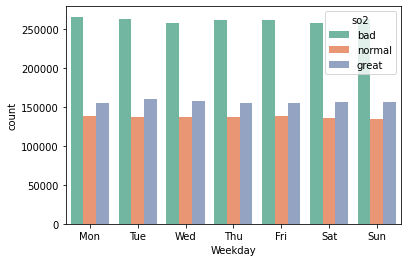

In [94]:
sns.countplot("Weekday",hue="so2",data=measure, palette="Set2", order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], hue_order=["bad","normal","great"])

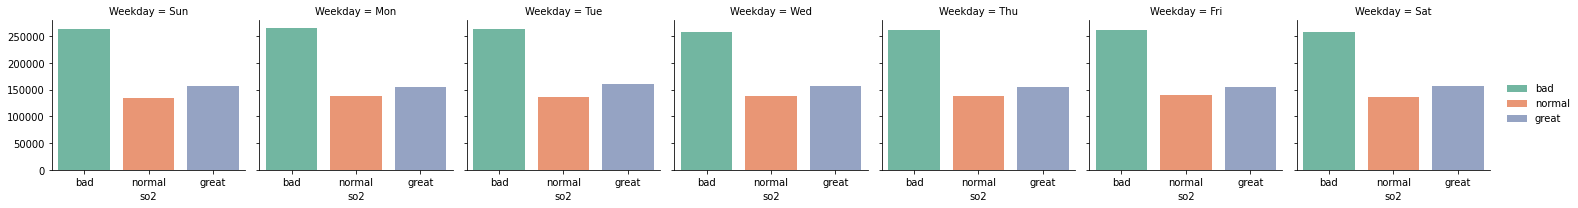

In [103]:
grid = sns.FacetGrid(col="Weekday",data=measure)
grid.map(sns.countplot,"so2",hue="so2",palette="Set2",order=["bad","normal","great"], hue_order=["bad","normal",'great'], dodge=False, data=measure)
grid.add_legend()

In [ ]:
# Regression

In [105]:
happy=pd.read_csv("2015.csv")
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [108]:
table2 = happy[['Country','Happiness Score']]
happy.drop(['Happiness Score'], axis=1, inplace=True)

In [109]:
happy = pd.merge(happy, table2, on="Country")
happy.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [110]:
happy.drop(['Country', 'Happiness Rank','Standard Error','Dystopia Residual'], axis=1, inplace=True)
happy.columns = ["Region",'GDP','Family','LifeExp','Freedom','GovCorr','Generosity', 'Happiness']

In [111]:
happy.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Happiness
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


In [212]:
happy.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [220]:
happy2 = happy.copy()
happy2['Region'] = happy2['Region'].map({'Western Europe':0, 'North America':2, 'Australia and New Zealand':3,
       'Middle East and Northern Africa':4, 'Latin America and Caribbean':5,
       'Southeastern Asia':6, 'Central and Eastern Europe':7, 'Eastern Asia':8,
       'Sub-Saharan Africa':9, 'Southern Asia':10})
happy2.drop(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], axis=1, inplace=True)
happy2.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Happiness
0,0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,0,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,0,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,0,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


In [228]:
X_train, X_test, y_train, y_test = train_test_split(happy2.drop("Happiness", axis=1), happy2["Happiness"], test_size=0.3)
X_train.head()
pipe = make_pipeline(StandardScaler(),
                     LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train,y_train)) # same
print(mean_squared_error(y_test,pipe.predict(X_test))) # better
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

0.784605536639132
0.27933277002161555


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Happiness   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1213.
Date:                Sun, 30 May 2021   Prob (F-statistic):                    6.65e-96
Time:                        01:39:12   Log-Likelihood:                         -100.75
No. Observations:                 110   AIC:                                      215.5
Df Residuals:                     103   BIC:                                      234.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Region         0.0754      0.017      4.425      0.000       0.042       0.109
GDP            0.7796      0.319      2.442      0.016       0.146       1.413
Family         2.1110      0.301      7.015      0.000       1.514       2.708
LifeExp        1.7160      0.396      4.332      0.000       0.930       2.502
Freedom        1.4862      0.531      2.801      0.006       0.434       2.539
GovCorr        1.3343      0.594      2.246      0.027       0.156       2.513
Generosity     0.9734      0.503      1.934      0.056      -0.025       1.971
==============================================================================
Omnibus:                        4.316   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                3.684
Skew:                          -0.409   Prob(JB):                        0.159
Kurtosis:                       3.369   Cond. No.                         75.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
dummies = pd.get_dummies(happy["Region"], drop_first=True)
happy[list(dummies.columns)] = dummies
happy.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Happiness,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,0,0,0,0,0,0,0,0,1
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,0,0,0,0,0,0,0,0,1
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,0,0,0,0,0,0,0,0,1
3,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,0,0,0,0,0,0,0,0,1
4,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,0,0,0,0,1,0,0,0,0


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(happy.drop("Happiness", axis=1), happy["Happiness"], test_size=0.3)
X_train.head()

,Region,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
118,Latin America and Caribbean,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,0,0,1,0,0,0,0,0,0
38,Middle East and Northern Africa,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,0,0,0,1,0,0,0,0,0
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,1
76,Central and Eastern Europe,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,1,0,0,0,0,0,0,0,0
97,Latin America and Caribbean,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,0,0,1,0,0,0,0,0,0


In [172]:
X_train.drop("Region", axis=1, inplace=True)
X_test.drop("Region", axis=1, inplace=True)
X_train.head()

,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
118,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,0,0,1,0,0,0,0,0,0
38,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,0,0,0,1,0,0,0,0,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,1
76,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,1,0,0,0,0,0,0,0,0
97,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,0,0,1,0,0,0,0,0,0


In [173]:
X_test.head()

,GDP,Family,LifeExp,Freedom,GovCorr,Generosity,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
141,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,0,0,0,0,0,0,0,1,0
64,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,0,0,1,0,0,0,0,0,0
19,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,0,0,0,1,0,0,0,0,0
94,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1,0,0,0,0,0,0,0,0
129,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1,0,0,0,0,0,0,0,0


In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(),
                    RandomForestRegressor())
params = {'randomforestregressor__n_estimators': [10**i for i in range(4)], 'randomforestregressor__max_depth':[i for i in range(1,10)]}
cv = GridSearchCV(pipe, param_grid=params, cv=5, scoring='r2') # ‘neg_mean_squared_error’
cv.fit(X_train, y_train)
print(cv.best_score_)
print(cv.score(X_test, y_test))
print(cv.best_params_)
print('MSE: %0.3f' %mean_squared_error(cv.predict(X_test), y_test))

0.7425642147486152
0.7755276563341947
{'randomforestregressor__max_depth': 7, 'randomforestregressor__n_estimators': 100}
MSE: 0.359


In [187]:
from xgboost import XGBRegressor
pipe = make_pipeline(StandardScaler(),
                    XGBRegressor())
params = {'xgbregressor__n_estimators': [10**i for i in range(4)], 'xgbregressor__max_depth':[i for i in range(1,10)]}
cv = GridSearchCV(pipe, param_grid=params, cv=5, scoring='r2') # ‘neg_mean_squared_error’
cv.fit(X_train, y_train)
print(cv.best_score_)
print(cv.score(X_test, y_test))
print(cv.best_params_)
print('MSE: %0.3f' %mean_squared_error(cv.predict(X_test), y_test))

0.744130302318313
0.7600506039637721
{'xgbregressor__max_depth': 1, 'xgbregressor__n_estimators': 100}
MSE: 0.383


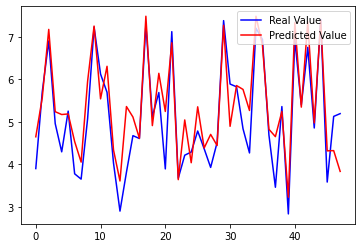

In [176]:
y_pred = cv.predict(X_test)
compare = pd.DataFrame({'pred':y_pred,'real':y_test})
x = len(compare)
plt.plot(range(x), compare['real'], c='b',  label='Real Value')
plt.plot(range(x), compare['pred'], c='r',  label='Predicted Value')
plt.legend(loc='upper right')

In [177]:
from sklearn.linear_model import LinearRegression
pipe=make_pipeline(StandardScaler(),
                  LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print('MSE: %0.3f' %mean_squared_error(pipe.predict(X_test), y_test)) # best

0.8283608072158544
0.7653654117662886
MSE: 0.375


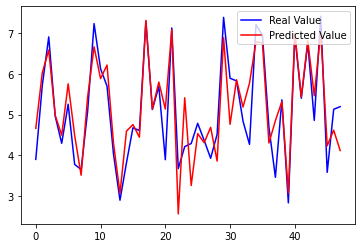

In [178]:
y_pred = pipe.predict(X_test)
compare = pd.DataFrame({'pred':y_pred,'real':y_test})
x = len(compare)
plt.plot(range(x), compare['real'], c='b',  label='Real Value')
plt.plot(range(x), compare['pred'], c='r',  label='Predicted Value')
plt.legend(loc='upper right') # better!

In [131]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Happiness   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              743.2
Date:                Sun, 30 May 2021   Prob (F-statistic):                    2.19e-91
Time:                        18:55:26   Log-Likelihood:                         -80.488
No. Observations:                 110   AIC:                                      191.0
Df Residuals:                      95   BIC:                                      231.5
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
GDP                                 1.1935      0.294      4.062      0.000       0.610       1.777
Family                              1.2456      0.293      4.249      0.000       0.664       1.828
LifeExp                             1.2890      0.545      2.363      0.020       0.206       2.372
Freedom                             1.0184      0.466      2.186      0.031       0.094       1.943
GovCorr                             0.5118      0.539      0.949      0.345      -0.558       1.582
Generosity                          1.1498      0.518      2.221      0.029       0.122       2.178
Central and Eastern Europe          1.4093      0.310      4.543      0.000       0.793       2.025
Eastern Asia                        0.9551      0.405      2.358      0.020       0.151       1.759
Latin America and Caribbean         2.0069      0.325      6.184      0.000       1.363       2.651
Middle East and Northern Africa     1.6020      0.304      5.269      0.000       0.998       2.206
North America                       1.6906      0.528      3.202      0.002       0.642       2.739
Southeastern Asia                   1.2044      0.356      3.383      0.001       0.498       1.911
Southern Asia                       1.6304      0.340      4.791      0.000       0.955       2.306
Sub-Saharan Africa                  1.7809      0.229      7.787      0.000       1.327       2.235
Western Europe                      1.2923      0.385      3.355      0.001       0.528       2.057
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                5.493
Skew:                          -0.030   Prob(JB):                       0.0642
Kurtosis:                       4.093   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
print(mean_squared_error(lm.predict(X_test), y_test))

0.39920043022166213

In [134]:
X_train_drop = X_train.drop(["GovCorr"], axis=1)
lm = sm.OLS(y_train, X_train_drop).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Happiness   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              779.7
Date:                Sun, 30 May 2021   Prob (F-statistic):                    6.58e-92
Time:                        18:58:20   Log-Likelihood:                         -86.813
No. Observations:                 110   AIC:                                      199.6
Df Residuals:                      97   BIC:                                      234.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
GDP                                 1.6367      0.259      6.326      0.000       1.123       2.150
Family                              1.5046      0.297      5.072      0.000       0.916       2.093
GovCorr                             1.2221      0.514      2.378      0.019       0.202       2.242
Generosity                          1.4981      0.529      2.833      0.006       0.449       2.548
Central and Eastern Europe          1.8788      0.276      6.815      0.000       1.332       2.426
Eastern Asia                        1.5924      0.360      4.418      0.000       0.877       2.308
Latin America and Caribbean         2.5804      0.287      9.000      0.000       2.011       3.149
Middle East and Northern Africa     1.9713      0.284      6.931      0.000       1.407       2.536
North America                       2.1712      0.529      4.103      0.000       1.121       3.221
Southeastern Asia                   1.7980      0.323      5.564      0.000       1.157       2.439
Southern Asia                       2.1065      0.315      6.677      0.000       1.480       2.733
Sub-Saharan Africa                  1.9988      0.230      8.707      0.000       1.543       2.454
Western Europe                      1.8348      0.353      5.198      0.000       1.134       2.535
==============================================================================
Omnibus:                        7.762   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.699
Skew:                           0.377   Prob(JB):                      0.00783
Kurtosis:                       4.244   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
X_test_drop = X_test.drop(["LifeExp","Freedom"], axis=1)
print(mean_squared_error(lm.predict(X_test_drop), y_test))

0.4744202088419125


In [180]:
X_test_drop = X_test.drop(["LifeExp","Freedom"], axis=1)
y_pred = lm.predict(X_test_drop)

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(),
                     LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train,y_train)) # same
print(mean_squared_error(y_test,pipe.predict(X_test))) # better
print(pipe.score(X_test, y_test))

pipe.fit(X_train_drop, y_train)
print(mean_squared_error(pipe.predict(X_test_drop),y_test))
print(pipe.score(X_test_drop, y_test))

0.8283608072158544
0.37486884748126664
0.7653654117662886
1.6840092522480967
-0.05404015334386547


In [182]:
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(),
                     SVR())
params = {"svr__C":[1*10**(i) for i in range(0,3)], "svr__kernel":['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(pipe, param_grid=params, cv=5)
fit = cv.fit(X_train, y_train)

In [183]:
fit.best_score_

0.7542739866103756

In [184]:
fit.score(X_test,y_test)

0.7808125611039672

In [185]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, fit.predict(X_test)) # best! SVR 짱

0.35018938690949986

In [199]:
from lightgbm import LGBMRegressor
pipe = make_pipeline(StandardScaler(),
                     LGBMRegressor())
params = {"lgbmregressor__num_leaves":[i for i in range(26,35)], 'lgbmregressor__n_estimators': [10**i for i in range(4)]}
cv = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error')
fit = cv.fit(X_train, y_train)

In [200]:
print(fit.best_params_)

{'lgbmregressor__n_estimators': 100, 'lgbmregressor__num_leaves': 26}


In [201]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, fit.predict(X_test))

0.40924344224233716

In [211]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [214]:
# column다를 때 맞춰 주는 코드
X_test, test_df = X_test.align(test_df, join = 'inner', axis = 1)

In [189]:
ypred = fit.predict(test_df)
sub= pd.DataFrame({'PassengerId':test_df["PassengerId"],'Survived':ypred})
sub.head()

ValueError: X has 9 features, but this StandardScaler is expecting 15 features as input.

In [ ]:
#이미지 데이터 전처리
X_train.reshape(-1,32*32*3) # 3차원 -> 1치원
X_train.reshape(-1,32*32*3)/255 # 정규화

In [ ]:
# tables

In [115]:
df = pd.DataFrame({'고객번호' : ['C1', 'C2', 'C2', 'C2'],
                   '상품번호' : ['P1', 'P1', 'P2', 'P2'],
                   '수량' :     [2, 3, 5, 10]})
df

,고객번호,상품번호,수량
0,C1,P1,2
1,C2,P1,3
2,C2,P2,5
3,C2,P2,10


In [117]:
# 고객별로 수량이 max인 것
idx=df.groupby(by='고객번호')['수량'].transform(max) == df['수량'] # 수량 column을 고객별 max 값으로 싹다 바꾼 것 == 원래 col 해서 boolean
new_df=df[idx] # T / F / F / T
new_df.reset_index(inplace=True)
sub = new_df.drop('index', axis=1)
sub

,고객번호,상품번호,수량
0,C1,P1,2
1,C2,P2,10


In [ ]:
# merge

In [118]:
df_left = pd.DataFrame({'KEY': ['K0', 'K1', 'K2', 'K3'],'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']})
df_left

,KEY,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [119]:
df_right = pd.DataFrame({'KEY': ['K2', 'K3', 'K4', 'K5'],'C': ['C2', 'C3', 'C4', 'C5'],'D': ['D2', 'D3', 'D4', 'D5']})
df_right

,KEY,C,D
0,K2,C2,D2
1,K3,C3,D3
2,K4,C4,D4
3,K5,C5,D5


In [120]:
#Outerleft join
df_merge_how_left = pd.merge(df_left, df_right,how="left",on='KEY')
df_merge_how_left

,KEY,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [121]:
#Outer right join
df_merge_how_right = pd.merge(df_left, df_right,how="right",on='KEY')
df_merge_how_right

,KEY,A,B,C,D
0,K2,A2,B2,C2,D2
1,K3,A3,B3,C3,D3
2,K4,NaN,NaN,C4,D4
3,K5,NaN,NaN,C5,D5


In [122]:
#inner join
df_merge_how_inner = pd.merge(df_left, df_right,how="inner",on='KEY')
df_merge_how_inner

,KEY,A,B,C,D
0,K2,A2,B2,C2,D2
1,K3,A3,B3,C3,D3


In [123]:
#full outer join
df_merge_how_outer = pd.merge(df_left, df_right,how="outer",on='KEY')
df_merge_how_outer

,KEY,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,NaN,NaN,C4,D4
5,K5,NaN,NaN,C5,D5
